In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import load_model
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
#%matplotlib notebook

model = load_model('i_predict CD_3D')

In [2]:
sc = StandardScaler()

In [3]:
df_aa = pd.read_csv('CD_3D 0.4-0.9V_std', usecols=[1,2,3,4,5])

In [4]:
df_a = df_aa.head(7225)
df_a

,x座標,y座標,z座標,V[V],i[A/m^2]
0,1.484631,1.600103,0.720667,-1.462261,1.042808
1,1.484631,1.630870,0.720667,-1.462261,1.048854
2,1.484631,1.630870,0.360358,-1.462261,1.084995
3,1.256258,1.661637,0.360358,-1.462261,1.150019
4,1.370444,1.661637,0.360358,-1.462261,1.119527
...,...,...,...,...,...
7220,-1.027474,-1.661194,-0.720567,-1.462261,1.748646
7221,-1.027474,-1.661194,-1.080876,-1.462261,1.748732
7222,-0.913287,-1.630427,-1.080876,-1.462261,1.731055
7223,-0.913287,-1.661194,-0.720567,-1.462261,1.732756


In [5]:
df_ab = pd.read_csv('CD_3D 0.4-0.9V', usecols=[1,2,3,4,5])
df_c  = df_ab.head(7225)
df_c

,x座標,y座標,z座標,V[V],i[A/m^2]
0,0.000800,0.010441,0.000633,0.4,27966.558421
1,0.000800,0.010540,0.000633,0.4,28018.444979
2,0.000800,0.010540,0.000617,0.4,28328.592610
3,0.000738,0.010638,0.000617,0.4,28886.594133
4,0.000769,0.010638,0.000617,0.4,28624.930799
...,...,...,...,...,...
7220,0.000123,0.000000,0.000567,0.4,34023.724907
7221,0.000123,0.000000,0.000550,0.4,34024.467848
7222,0.000154,0.000099,0.000550,0.4,33872.768657
7223,0.000154,0.000000,0.000567,0.4,33887.366289


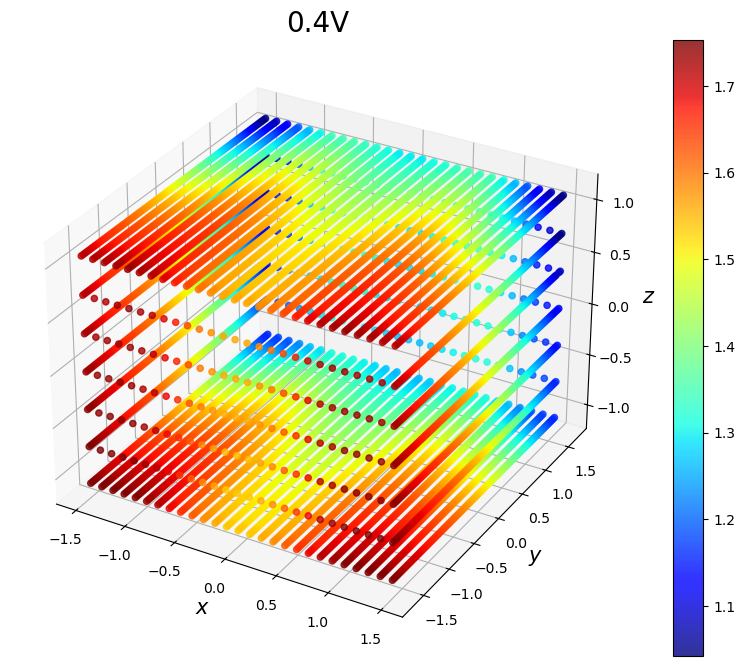

In [6]:
#正規化されてるグラフ
fig1 = plt.figure(figsize=(12, 8))
ax1 = fig1.add_subplot(111, projection='3d')

sc1 = ax1.scatter3D(df_a['x座標'], df_a['y座標'],df_a['z座標'], c=df_a['i[A/m^2]'], cmap='jet', alpha=0.8) 
plt.colorbar(sc1)

ax1.set_title("0.4V", fontsize=20)
ax1.set_xlabel('$x$', fontsize=15)
ax1.set_ylabel('$y$', fontsize=15)
ax1.set_zlabel('$z$', fontsize=15)

plt.show()

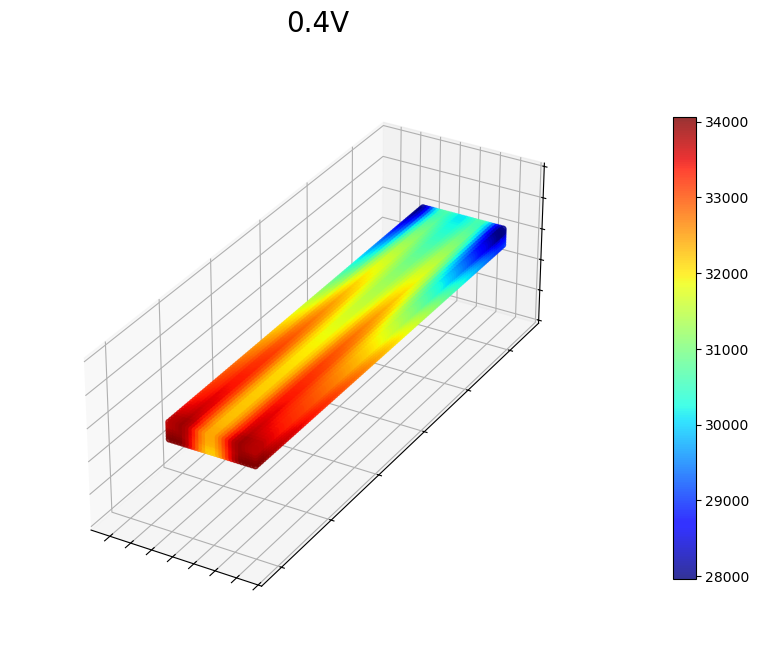

In [7]:
#正規化されてないグラフ
fig2 = plt.figure(figsize=(12, 8))
ax2 = fig2.add_subplot(111, projection='3d')

sc2 = ax2.scatter(df_c['x座標'], df_c['y座標'],df_c['z座標'], c=df_c['i[A/m^2]'], cmap='jet', alpha=0.8)
plt.colorbar(sc2, ax=ax2, shrink=0.75) #colorbarのサイズを縦横0.5倍にする。)

ax2.set_title("0.4V", fontsize=20)
#ax4.set_xlabel('$x$', fontsize=15)
#ax4.set_ylabel('$y$', fontsize=15)
#ax4.set_zlabel('$z$', fontsize=15)
ax2.set_box_aspect((1,3,1))
ax2.axes.xaxis.set_ticklabels([])
ax2.axes.yaxis.set_ticklabels([])
ax2.axes.zaxis.set_ticklabels([])

ax2.set_xlim(-0.00055,0.001)
ax2.set_zlim(0,0.001)
plt.savefig('PEM_CD_Predict_0.4V.png')
plt.show()

In [8]:
df_v = df_aa.loc[:,'V[V]']
v_mean = df_v.mean()
v_std = df_v.std()
print(v_mean)
print(v_std)

6.778241056598879e-17
1.00000532343884


In [9]:
#predictで正規化された出力求める→全てのパラメータを正規化から戻す

In [10]:
#v_a =   np.array(v)*v_std + v_mean 

In [11]:
#v_a

In [12]:
df_V = pd.DataFrame([0.4,0.45,0.5,0.55,0.6,0.65,0.7,0.75,0.8,0.85,0.9])
print(df_V.mean())
print(df_V.std())

0    0.65
dtype: float64
0    0.165831
dtype: float64


In [13]:
V_pre = (0.42-df_V.mean())/df_V.std()
V_pre

0   -1.386952
dtype: float64

In [14]:
df_pre = pd.read_csv('CD_3D 0.4-0.9V_std', usecols=[1,2,3])

In [15]:
df_pre = df_pre.head(7225)
df_pre

,x座標,y座標,z座標
0,1.484631,1.600103,0.720667
1,1.484631,1.630870,0.720667
2,1.484631,1.630870,0.360358
3,1.256258,1.661637,0.360358
4,1.370444,1.661637,0.360358
...,...,...,...
7220,-1.027474,-1.661194,-0.720567
7221,-1.027474,-1.661194,-1.080876
7222,-0.913287,-1.630427,-1.080876
7223,-0.913287,-1.661194,-0.720567


In [16]:
df_pre.insert(3, 'V[V]', -1.386952) 
df_pre

,x座標,y座標,z座標,V[V]
0,1.484631,1.600103,0.720667,-1.386952
1,1.484631,1.630870,0.720667,-1.386952
2,1.484631,1.630870,0.360358,-1.386952
3,1.256258,1.661637,0.360358,-1.386952
4,1.370444,1.661637,0.360358,-1.386952
...,...,...,...,...
7220,-1.027474,-1.661194,-0.720567,-1.386952
7221,-1.027474,-1.661194,-1.080876,-1.386952
7222,-0.913287,-1.630427,-1.080876,-1.386952
7223,-0.913287,-1.661194,-0.720567,-1.386952


In [17]:
df_i_pre = pd.DataFrame(model.predict(df_pre), columns = ['i[A/m^2]'])

226/226 [==============================] - 1s 2ms/step


In [18]:
df_i_pre

,i[A/m^2]
0,1.034977
1,1.027237
2,1.050148
3,1.108375
4,1.071887
...,...
7220,1.651161
7221,1.649178
7222,1.634954
7223,1.640182


In [19]:
df = pd.concat([df_pre, df_i_pre], axis=1)

In [20]:
df_b = df.head(7225)
df_b

,x座標,y座標,z座標,V[V],i[A/m^2]
0,1.484631,1.600103,0.720667,-1.386952,1.034977
1,1.484631,1.630870,0.720667,-1.386952,1.027237
2,1.484631,1.630870,0.360358,-1.386952,1.050148
3,1.256258,1.661637,0.360358,-1.386952,1.108375
4,1.370444,1.661637,0.360358,-1.386952,1.071887
...,...,...,...,...,...
7220,-1.027474,-1.661194,-0.720567,-1.386952,1.651161
7221,-1.027474,-1.661194,-1.080876,-1.386952,1.649178
7222,-0.913287,-1.630427,-1.080876,-1.386952,1.634954
7223,-0.913287,-1.661194,-0.720567,-1.386952,1.640182


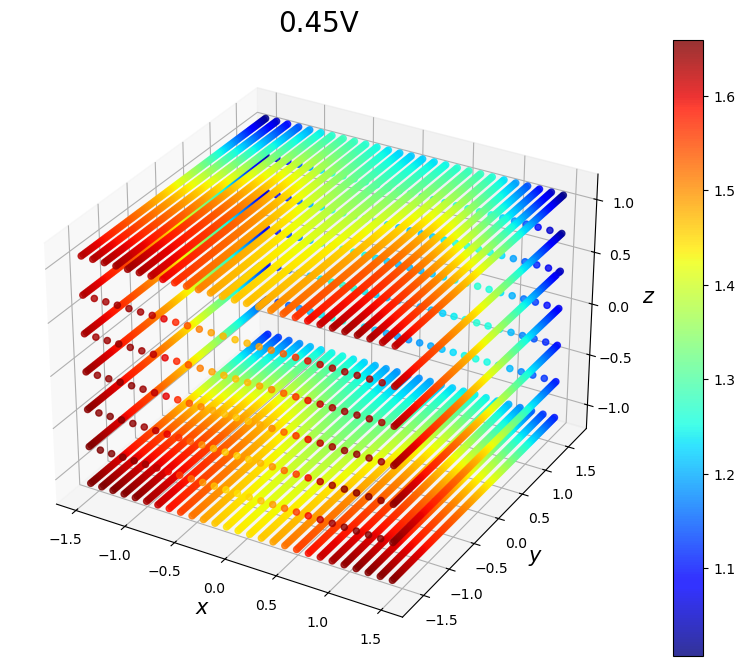

In [21]:
fig3 = plt.figure(figsize=(12, 8))
ax3 = fig3.add_subplot(111, projection='3d')

sc3 = ax3.scatter(df_b['x座標'], df_b['y座標'],df_b['z座標'], c=df_b['i[A/m^2]'], cmap='jet', alpha=0.8)
plt.colorbar(sc3)

ax3.set_title("0.45V", fontsize=20)
ax3.set_xlabel('$x$', fontsize=15)
ax3.set_ylabel('$y$', fontsize=15)
ax3.set_zlabel('$z$', fontsize=15)


plt.show()
#plt.savefig('PEM_CD_Predict_stdL.png')

In [22]:
df_i = pd.read_csv('CD_3D 0.4-0.9V', usecols=[5])

In [23]:
df_i.mean()

i[A/m^2]    19017.676022
dtype: float64

In [24]:
df_i.std()

i[A/m^2]    8581.572725
dtype: float64

In [25]:
df_i_re = (df_i_pre*df_i.std() + df_i.mean() ).head(7225) #iの予測値の標準化を戻す
df_i_re

,i[A/m^2]
0,27899.409136
1,27832.985539
2,28029.595498
3,28529.275267
4,28216.156498
...,...
7220,33187.231796
7221,33170.217207
7222,33048.151444
7223,33093.018318


In [26]:
df_i_re_c = df_i_re.head(7225)

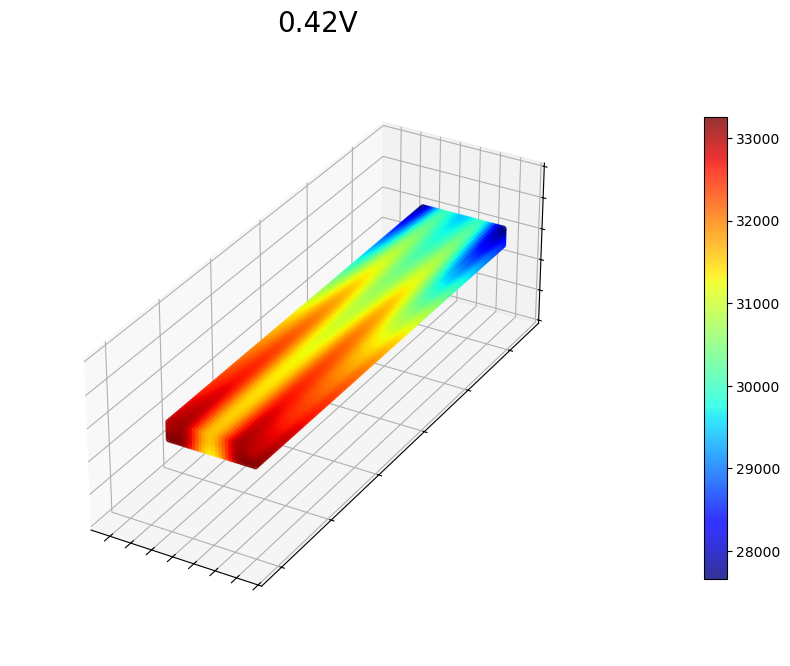

In [27]:
fig4 = plt.figure(figsize=(20, 8))
ax4 = fig4.add_subplot(111, projection='3d')

sc4 = ax4.scatter(df_c['x座標'], df_c['y座標'], df_c['z座標'],c=df_i_re_c['i[A/m^2]'], cmap='jet', alpha=0.8)
plt.colorbar(sc4, ax=ax4, shrink=0.75) #colorbarのサイズを縦横0.5倍にする。)

ax4.set_title("0.42V", fontsize=20)
#ax4.set_xlabel('$x$', fontsize=15)
#ax4.set_ylabel('$y$', fontsize=15)
#ax4.set_zlabel('$z$', fontsize=15)
ax4.set_box_aspect((1,3,1))
ax4.axes.xaxis.set_ticklabels([])
ax4.axes.yaxis.set_ticklabels([])
ax4.axes.zaxis.set_ticklabels([])

ax4.set_xlim(-0.00055,0.001)
ax4.set_zlim(0,0.001)
plt.savefig('PEM_CD_Predict_0.42V.png')
plt.show()

In [28]:
df_d = pd.read_excel('/Users/aruhy/OneDrive/デスクトップ/data/10-26/CD_3D 0.42V.xlsx',names=['x座標','y座標','z座標','i[A/m^2]'] ,header=8) 

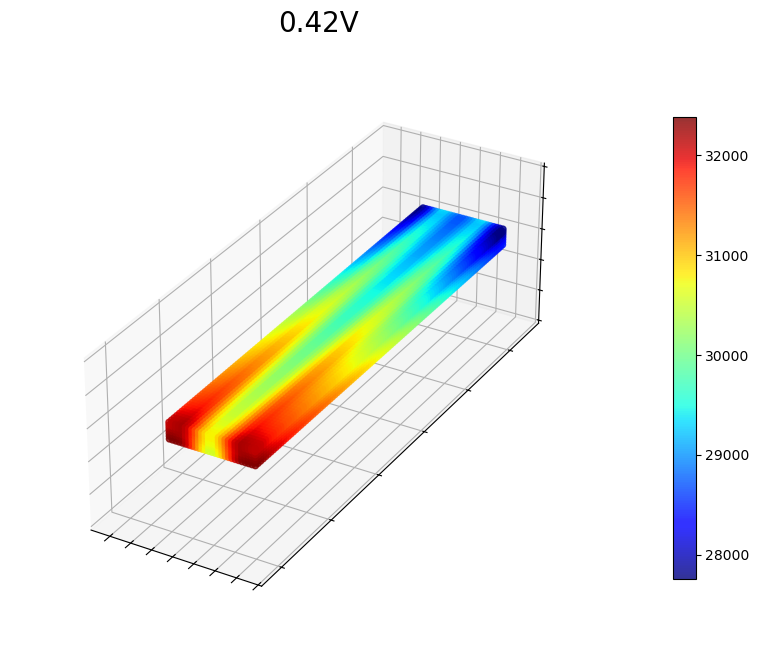

In [29]:
#COMSOLの結果
fig5 = plt.figure(figsize=(12, 8))
ax5 = fig5.add_subplot(111, projection='3d')

sc5 = ax5.scatter(df_d['x座標'], df_d['y座標'],df_d['z座標'], c=df_d['i[A/m^2]'], cmap='jet', alpha=0.8)
plt.colorbar(sc5, ax=ax5, shrink=0.75) #colorbarのサイズを縦横0.5倍にする。)

ax5.set_title("0.42V", fontsize=20)
#ax5.set_xlabel('$x$', fontsize=15)
#ax5.set_ylabel('$y$', fontsize=15)
#ax5.set_zlabel('$z$', fontsize=15)
ax5.set_box_aspect((1,3,1))
ax5.axes.xaxis.set_ticklabels([])
ax5.axes.yaxis.set_ticklabels([])
ax5.axes.zaxis.set_ticklabels([])

ax5.set_xlim(-0.00055,0.001)
ax5.set_zlim(0,0.001)
plt.savefig('PEM_CD_COMSOL_0.42V.png')
plt.show()

In [30]:
df7 = df_aa.drop(['i[A/m^2]'], axis=1)
df8 = pd.DataFrame(model.predict(df7)) 

2936/2936 [==============================] - 7s 2ms/step


In [34]:
MAPE = tf.keras.metrics.mean_absolute_percentage_error(df_aa['i[A/m^2]'].head(7225), df8.head(7225))
MAPE

ResourceExhaustedError: {{function_node __wrapped__Sub_device_/job:localhost/replica:0/task:0/device:CPU:0}} OOM when allocating tensor with shape[7225,7225] and type float on /job:localhost/replica:0/task:0/device:CPU:0 by allocator mklcpu [Op:Sub]

In [ ]:
tf.keras.metrics.mean_squared_error(df1_std['i[A/m^2]'].head(90000), df8.head(90000))